In [1]:
!pip install yfinance pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [4]:
import sys
!{sys.executable} -m pip install yfinance pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import sys
!{sys.executable} -m pip install yfinance pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!C:\ProgramData\Anaconda3\python.exe -m pip install yfinance pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
!conda install -y -c conda-forge yfinance

Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [10]:
!pip install --user yfinance pandas scikit-learn matplotlib

In [11]:
# Select a stock [cite: 31]
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2026-02-28")

# Inspect data [cite: 14, 15]
print(data.head())
print(data.info())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.096001  128.833979  122.210204  128.223770  112117500
2023-01-04  124.365654  126.629356  123.105858  124.887288   89113600
2023-01-05  123.046806  125.753403  122.790915  125.123505   80962700
2023-01-06  127.574173  128.233596  122.918832  124.021157   87754700
2023-01-09  128.095840  131.304398  127.839949  128.410797   70790800
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 791 entries, 2023-01-03 to 2026-02-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   791 non-null    float64
 1   (High, AAPL)    791 non-null    float64
 2   (Low, AAPL)     791 non-null    float64
 3   (Open, AAPL)    791 non-null    float64
 4   (Volume, AAPL)  791 non-null    int64  
dt

In [14]:
# Use Open, High, Low, and Volume as features 
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Create a 'Target' column which is the next day's close 
data['Target'] = data['Close'].shift(-1)

# Drop missing values caused by the shift [cite: 33, 48]
data.dropna(inplace=True)

X = data[features]
y = data['Target']

In [16]:
# Select a stock
ticker = 'AAPL'
# Let's use a wider date range to ensure we get data
data = yf.download(ticker, start="2025-01-01", end="2026-02-28")

# DEBUG: Check if data was actually downloaded
print("Data shape after download:", data.shape)

if data.empty:
    print("Error: No data was downloaded. Check your internet connection or the ticker symbol.")
else:
    # Preprocessing
    features = ['Open', 'High', 'Low', 'Volume']
    data['Target'] = data['Close'].shift(-1)
    
    # DEBUG: Check how many rows are left before dropping
    print("Data shape before dropna:", data.shape)
    
    data.dropna(inplace=True)
    
    # DEBUG: Check how many rows are left after dropping
    print("Data shape after dropna:", data.shape)

    if not data.empty:
        X = data[features]
        y = data['Target']
        print("Everything looks good! Proceeding to split.")
    else:
        print("Error: All rows were dropped during the cleaning process.")

[*********************100%***********************]  1 of 1 completed

Data shape after download: (289, 5)
Data shape before dropna: (289, 6)
Data shape after dropna: (288, 6)
Everything looks good! Proceeding to split.


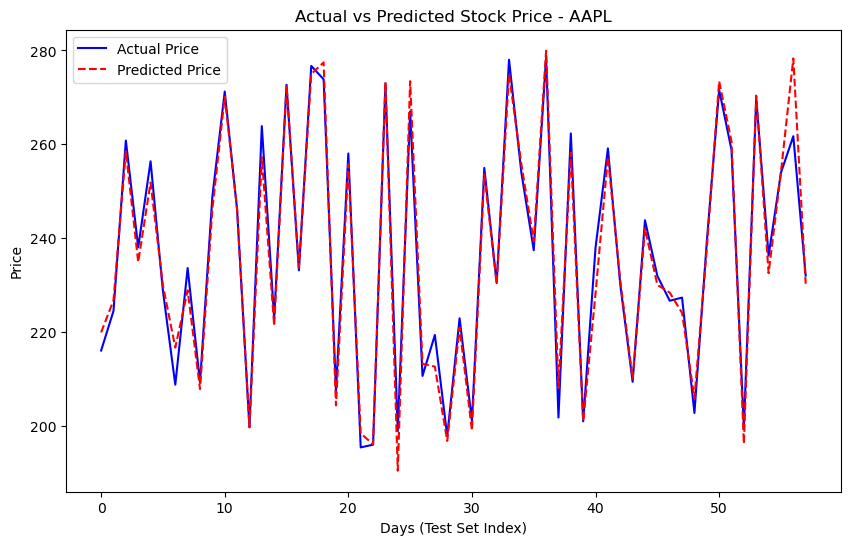

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the closing prices for the test set
predictions = model.predict(X_test)

# Plot actual vs predicted closing prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red', linestyle='--')
plt.title(f'Actual vs Predicted Stock Price - {ticker}')
plt.xlabel('Days (Test Set Index)')
plt.ylabel('Price')
plt.legend()
plt.show()